In [168]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, multilabel_confusion_matrix
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

In [169]:
data_raw=pd.read_csv("./data/Train.csv")
meta=pd.read_csv("./data/airqo_metadata.csv")

In [170]:
from files.preprocessing import preprocessing

In [171]:
data = preprocessing(data_raw, use_location=False, only_means=False, drop=['wind_dir'])

/Users/denniseickhorn/neuefische/ML-Project-1/files/preprocessing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(features,1,inplace=True)


In [172]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [173]:
#param_grid = {'criterion': ['gini', 'entropy'],
#                'max_depth': [None] + list(np.linspace(2,32,10).astype(int)),
#                'min_samples_split': np.linspace(2,22,10).astype(int),
#                'min_samples_leaf': np.linspace(2,22,10).astype(int)
#}
#param_grid = {'depth': [4,5,6,7,8,9, 10],
#                'learning_rate': [0.01,0.02,0.03,0.04],
#                'iterations': [10, 20,30,40,50,60,70,80,90, 100]
#                 }
param_grid = {
    'n_estimators': [50,100,200,300,400,500],
    'max_depth': [40,50,60],
    'max_features': ['sqrt','log2']
}


gs = GridSearchCV(ExtraTreesRegressor(random_state=42), verbose=2, param_grid=param_grid, cv=5, n_jobs=-1)
#gs.fit(X_train, y_train)
#gs.best_params_

In [174]:
#reg = LinearRegression()
#reg = DecisionTreeRegressor()
#reg = RandomForestRegressor()
reg = ExtraTreesRegressor(n_estimators=400, max_depth=50, max_features= 'log2', random_state=42)
#reg = gs.best_estimator_
#reg = XGBRegressor()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
print(mean_squared_error(y_test, y_pred_reg, squared=False))
y_pred_reg_train = reg.predict(X_train)
print(mean_squared_error(y_train, y_pred_reg_train, squared=False))

24.466012288242297
6.035853589337779


Text(0.5, 0, 'datapoint')

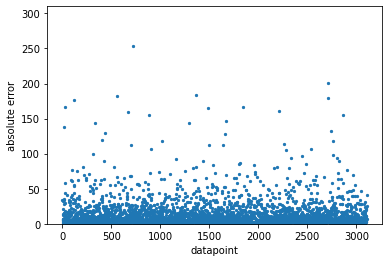

In [183]:
plt.scatter(x=range(len(y_test)),y= np.abs(y_test-y_pred_reg), s=5.0)
plt.ylim([0,310])
plt.ylabel('absolute error')
plt.xlabel('datapoint')

In [178]:
sorted(np.array([X_train.columns, reg.feature_importances_]).T, key= lambda t: t[1])

[array(['min_precip', 0.0], dtype=object),
 array(['median_precip', 0.0], dtype=object),
 array(['last_precip', 0.00972698190085877], dtype=object),
 array(['max_precip', 0.014099869204708187], dtype=object),
 array(['min_rel_humidity', 0.0141710378998054], dtype=object),
 array(['ptp_precip', 0.0142066338343505], dtype=object),
 array(['max_temp', 0.014557846365048603], dtype=object),
 array(['ptp_temp', 0.014759447327494284], dtype=object),
 array(['ptp_rel_humidity', 0.015322501891334748], dtype=object),
 array(['ptp_atmos_press', 0.01608140904234258], dtype=object),
 array(['min_wind_spd', 0.0163518247710736], dtype=object),
 array(['max_rel_humidity', 0.017613579185486047], dtype=object),
 array(['mean_last_day_precip', 0.018384521345417598], dtype=object),
 array(['min_temp', 0.01934782598640471], dtype=object),
 array(['var_precip', 0.021799438430470296], dtype=object),
 array(['mean_precip', 0.022008342286882896], dtype=object),
 array(['max_wind_spd', 0.0237538343180718], dtyp

In [179]:
y_test_MC = pd.cut(y_test, bins=[0,12,35,55,150,250, float('inf')])
y_pred_reg_MC = pd.cut(y_pred_reg, bins=[0,12,35,55,150,250, float('inf')])

In [180]:
confusion_matrix(y_test_MC.values, y_pred_reg_MC)

ValueError: unknown is not supported

In [ ]:
y_test_MC.values.rename_categories([0,1,2,3,4,5])

[2, 3, 2, 2, 3, ..., 2, 3, 1, 1, 3]
Length: 3108
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [ ]:
y_pred_reg_MC

[(55.0, 150.0], (55.0, 150.0], (55.0, 150.0], (55.0, 150.0], (55.0, 150.0], ..., (55.0, 150.0], (55.0, 150.0], (55.0, 150.0], (35.0, 55.0], (55.0, 150.0]]
Length: 3108
Categories (6, interval[float64, right]): [(0.0, 12.0] < (12.0, 35.0] < (35.0, 55.0] < (55.0, 150.0] < (150.0, 250.0] < (250.0, inf]]